In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pyforest  ###Use major Python libraries without importing

from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"
import warnings

warnings.filterwarnings("ignore")

<IPython.core.display.Javascript object>

In [3]:
###Although this dataset is quite small in size, I wanted to show how to read data using chunks
chunks = pd.read_csv(
    "/Users/vsinha/Desktop/ML/globalterrorismdb_0718dist.csv",
    chunksize=100000,
    encoding="ISO-8859-1",
    dtype=object,
)
data = pd.DataFrame()
%time data=pd.concat(chunks)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

CPU times: user 2.72 s, sys: 323 ms, total: 3.04 s
Wall time: 3.05 s


<IPython.core.display.Javascript object>

In [25]:
###View of the imported data
data.head(5)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


<IPython.core.display.Javascript object>

In [11]:
print("The total number of enteries in the terrorism dataset is " + str(len(data)))
print() ##to insert space between 2 print statements
data.info()
# data.describe()

The total number of enteries in the terrorism dataset is 181691

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: object(135)
memory usage: 187.1+ MB


<IPython.core.display.Javascript object>

In [23]:
###Get column names
data.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

<IPython.core.display.Javascript object>

In [21]:
###check missing values in the data
data.isnull().sum().values

array([     0,      0,      0,      0, 172452,      0, 179471,      0,
            0,      0,      0,    421,    434,   4556,   4557,      6,
            0, 126196,  66129,      0,      0,      0,      1, 152680,
       152680,      1,      0,      0,      0,      0, 175377, 175377,
       181263, 181263,      0,      0,  10373,  10373,  42550,    636,
         1559,   1559, 170547, 170547, 171006, 171006, 171574, 170671,
       170863, 170863, 180515, 180515, 180594, 180594, 180665, 180516,
       180544, 180544,      0, 175801, 179678, 181531, 181367, 181671,
       131130,    380, 179736, 181371,      0,  71115,  69489,  66120,
       162608, 162608, 179801, 181075, 181075, 181373, 181558, 181558,
       176852,      0,      0,  20768,  20768, 168564, 168564, 170149,
       170149, 179828, 179828, 179998, 179998, 181618, 181618, 181621,
       181621,  67670,  10313,  64446,  66958,  16311,  64702,  69143,
            0, 117626, 117626, 142702, 123732,    178, 168119, 168174,
      

<IPython.core.display.Javascript object>

In [18]:
###Sort the columns with highest number of missing values
data.isnull().sum().sort_values(ascending=False).head(30)

gsubname3           181671
weapsubtype4_txt    181621
weapsubtype4        181621
weaptype4           181618
weaptype4_txt       181618
claimmode3          181558
claimmode3_txt      181558
gsubname2           181531
claim3              181373
guncertain3         181371
gname3              181367
divert              181367
attacktype3         181263
attacktype3_txt     181263
ransomnote          181177
ransompaidus        181139
ransomamtus         181128
claimmode2          181075
claimmode2_txt      181075
ransompaid          180917
corp3               180665
targsubtype3        180594
targsubtype3_txt    180594
natlty3             180544
natlty3_txt         180544
target3             180516
targtype3_txt       180515
targtype3           180515
ransomamt           180341
weapsubtype3        179998
dtype: int64

<IPython.core.display.Javascript object>

In [41]:
###lets get rid of all those columns where missing data is greater than 20%
###After this step, we are now down to 47 columns from original 135 columns

limitPer = len(data) * 0.80
data1 = data.dropna(thresh=limitPer, axis=1)
data1.head()

print("The shape of the new dataset (<20% missingness) is " + str(data1.shape))

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,...,weapsubtype1_txt,nkill,nwound,property,ishostkid,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,...,NaN,1,0,0,0,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,...,NaN,0,0,0,1,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,...,NaN,1,0,0,0,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,...,Unknown Explosive Type,NaN,NaN,1,0,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,...,NaN,NaN,NaN,1,0,PGIS,-9,-9,1,1


The shape of the new dataset (<20% missingness) is (181691, 47)


<IPython.core.display.Javascript object>

In [42]:
###Info of the new dataset
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 47 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   eventid           181691 non-null  object
 1   iyear             181691 non-null  object
 2   imonth            181691 non-null  object
 3   iday              181691 non-null  object
 4   extended          181691 non-null  object
 5   country           181691 non-null  object
 6   country_txt       181691 non-null  object
 7   region            181691 non-null  object
 8   region_txt        181691 non-null  object
 9   provstate         181270 non-null  object
 10  city              181257 non-null  object
 11  latitude          177135 non-null  object
 12  longitude         177134 non-null  object
 13  specificity       181685 non-null  object
 14  vicinity          181691 non-null  object
 15  crit1             181691 non-null  object
 16  crit2             181691 non-null  obj

<IPython.core.display.Javascript object>

In [43]:
###change some of the columns of data1 which has less than 20% of missing values
data1.columns.values.tolist()
data1.rename(
    columns={
        "iyear": "year",
        "imonth": "month",
        "iday": "day",
        "country_txt": "country_name",
        "region_txt": "region_name",
        "provstate": "province",
        "success": "successful_attack",
        "suicide": "suicide_attack",
        "attacktype1": "attacktype",
        "attacktype1_txt": "attack_method",
        "targtype1": "targtype",
        "targtype1_txt": "target",
        "targsubtype1": "targsubtype",
        "targsubtype1_txt": "target_general",
        "target1": "target_specific",
        "natlty1_txt": "nationality",
        "gname": "terrorist_group",
        "weaptype1": "",
        "weaptype1": "weaptype",
        "weaptype1_txt": "weapontype",
        "weapsubtype1": "weaponsubtype",
        "weapsubtype1_txt": "weapon_specific",
        "nkill": "killed",
        "nwound": "wounded",
        "dbsource": "source",
    },
    inplace=True,
)

###check the updated column names
data1.columns

['eventid',
 'iyear',
 'imonth',
 'iday',
 'extended',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'targtype1',
 'targtype1_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'target1',
 'natlty1',
 'natlty1_txt',
 'gname',
 'guncertain1',
 'individual',
 'weaptype1',
 'weaptype1_txt',
 'weapsubtype1',
 'weapsubtype1_txt',
 'nkill',
 'nwound',
 'property',
 'ishostkid',
 'dbsource',
 'INT_LOG',
 'INT_IDEO',
 'INT_MISC',
 'INT_ANY']

Index(['eventid', 'year', 'month', 'day', 'extended', 'country',
       'country_name', 'region', 'region_name', 'province', 'city', 'latitude',
       'longitude', 'specificity', 'vicinity', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'multiple', 'successful_attack', 'suicide_attack',
       'attacktype', 'attack_method', 'targtype', 'target', 'targsubtype',
       'target_general', 'target_specific', 'natlty1', 'nationality',
       'terrorist_group', 'guncertain1', 'individual', 'weaptype',
       'weapontype', 'weaponsubtype', 'weapon_specific', 'killed', 'wounded',
       'property', 'ishostkid', 'source', 'INT_LOG', 'INT_IDEO', 'INT_MISC',
       'INT_ANY'],
      dtype='object')

<IPython.core.display.Javascript object>

In [84]:
###removing columns that are not helpful in analyzing the data
remove_cols = [
    "specificity",
    "vicinity",
    "crit1",
    "crit2",
    "crit3",
    "doubtterr",
    "multiple",
    "guncertain1",
    "individual",
    "ishostkid",
    "INT_LOG",
    "INT_IDEO",
    "INT_MISC",
    "INT_ANY",
]
data2 = data1.drop(remove_cols, axis=1)
data2.head()

,eventid,year,month,day,extended,country,country_name,region,region_name,province,...,nationality,terrorist_group,weaptype,weapontype,weaponsubtype,weapon_specific,killed,wounded,property,source
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,...,Dominican Republic,MANO-D,13,Unknown,NaN,NaN,1,0,0,PGIS
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,...,Belgium,23rd of September Communist League,13,Unknown,NaN,NaN,0,0,0,PGIS
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,...,United States,Unknown,13,Unknown,NaN,NaN,1,0,0,PGIS
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,...,United States,Unknown,6,Explosives,16,Unknown Explosive Type,NaN,NaN,1,PGIS
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,...,United States,Unknown,8,Incendiary,NaN,NaN,NaN,NaN,1,PGIS


<IPython.core.display.Javascript object>

In [85]:
data2.dtypes

eventid              object
year                 object
month                object
day                  object
extended             object
country              object
country_name         object
region               object
region_name          object
province             object
city                 object
latitude             object
longitude            object
successful_attack    object
suicide_attack       object
attacktype           object
attack_method        object
targtype             object
target               object
targsubtype          object
target_general       object
target_specific      object
natlty1              object
nationality          object
terrorist_group      object
weaptype             object
weapontype           object
weaponsubtype        object
weapon_specific      object
killed               object
wounded              object
property             object
source               object
dtype: object

<IPython.core.display.Javascript object>

In [86]:
data2[
    [
        "eventid",
        "year",
        "month",
        "day",
        "extended",
        "country",
        "region",
        "successful_attack",
        "suicide_attack",
        "attacktype",
        "targtype",
        "targsubtype",
        "weaptype",
        "weaponsubtype",
        "killed",
        "wounded",
        "property",
    ]
] = data2[
    [
        "eventid",
        "year",
        "month",
        "day",
        "extended",
        "country",
        "region",
        "successful_attack",
        "suicide_attack",
        "attacktype",
        "targtype",
        "targsubtype",
        "weaptype",
        "weaponsubtype",
        "killed",
        "wounded",
        "property",
    ]
].apply(
    pd.to_numeric
)

# Other methids to convert
# = data2[['eventid', "year", "month"]].astype(int)

# convert_dict = {'eventid': int, 'terrorist_group': str}

# df = df.astype(convert_dict)
# print(df.dtypes)


data2.dtypes

<IPython.core.display.Javascript object>

eventid                int64
year                   int64
month                  int64
day                    int64
extended               int64
country                int64
country_name          object
region                 int64
region_name           object
province              object
city                  object
latitude              object
longitude             object
successful_attack      int64
suicide_attack         int64
attacktype             int64
attack_method         object
targtype               int64
target                object
targsubtype          float64
target_general        object
target_specific       object
natlty1               object
nationality           object
terrorist_group       object
weaptype               int64
weapontype            object
weaponsubtype        float64
weapon_specific       object
killed               float64
wounded              float64
property               int64
source                object
dtype: object

<IPython.core.display.Javascript object>

In [87]:
###We can group tha data based of different meaures. In the example below, I have used "attack_method" to group the data and print the first observation
data2.groupby("attack_method").first()

,eventid,year,month,day,extended,country,country_name,region,region_name,province,...,nationality,terrorist_group,weaptype,weapontype,weaponsubtype,weapon_specific,killed,wounded,property,source
attack_method,,,,,,,,,,,,,,,,,,,,,
Armed Assault,197001010002,1970,1,1,0,217,United States,1,North America,Illinois,...,United States,Black Nationalists,5,Firearms,5.0,Unknown Gun Type,0.0,0.0,1,Hewitt Project
Assassination,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,Tarlac,...,Dominican Republic,MANO-D,13,Unknown,2.0,Automatic or Semi-Automatic Rifle,1.0,0.0,0,PGIS
Bombing/Explosion,197001000002,1970,1,0,0,78,Greece,8,Western Europe,Attica,...,United States,Unknown,6,Explosives,16.0,Unknown Explosive Type,0.0,0.0,1,PGIS
Facility/Infrastructure Attack,197001000003,1970,1,0,0,101,Japan,4,East Asia,Fukouka,...,United States,Unknown,8,Incendiary,19.0,Molotov Cocktail/Petrol Bomb,0.0,0.0,1,PGIS
Hijacking,197001080001,1970,1,8,0,98,Italy,8,Western Europe,Lazio,...,United States,Unknown,5,Firearms,4.0,Rifle/Shotgun (non-automatic),0.0,0.0,0,Hijacking DB
Hostage Taking (Barricade Incident),197006090004,1970,6,9,1,102,Jordan,10,Middle East & North Africa,Amman,...,Multinational,Popular Front for the Liberation of Palestine ...,5,Firearms,2.0,Automatic or Semi-Automatic Rifle,0.0,0.0,1,PGIS
Hostage Taking (Kidnapping),197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,...,Belgium,23rd of September Communist League,13,Unknown,2.0,Automatic or Semi-Automatic Rifle,0.0,0.0,0,PGIS
Unarmed Assault,197005220001,1970,5,22,0,217,United States,1,North America,New York,...,West Bank and Gaza Strip,Jewish Defense League (JDL),9,Melee,21.0,Blunt Object,0.0,3.0,1,HSI
Unknown,197001110001,1970,1,11,0,65,Ethiopia,11,Sub-Saharan Africa,Unknown,...,United States,Eritrean Liberation Front,13,Unknown,5.0,Unknown Gun Type,1.0,0.0,0,PGIS


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 864x648 with 0 Axes>

<IPython.core.display.Javascript object>

<AxesSubplot:>

<IPython.core.display.Javascript object>

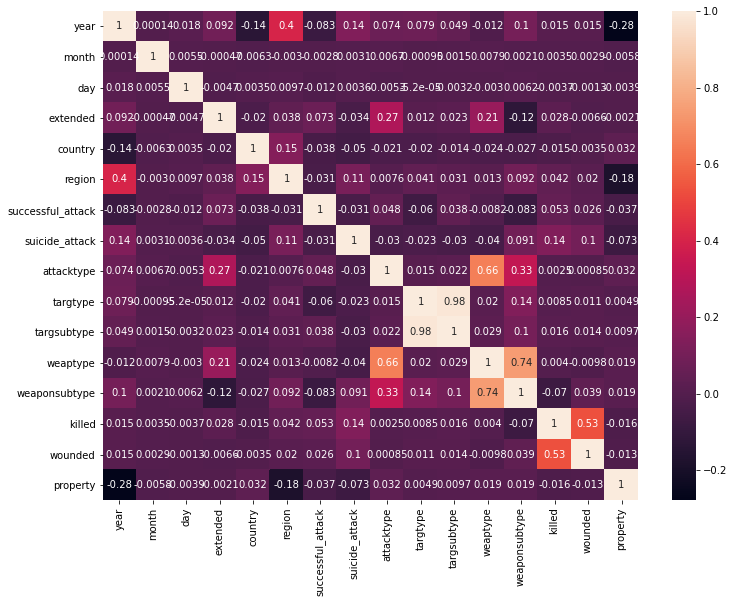

<IPython.core.display.Javascript object>

In [90]:
###PLot the correlation between numerical variables
plot_corr = data2.drop("eventid", axis=1)
plt.figure(figsize=(12, 9))
sns.heatmap(plot_corr.corr(), annot=True)
plt.show()

In [95]:
### Weaptype is strongly correlated with weaponsubtype whereas weaptype also shows moderate correlation with attacktype.

data2[
    [
        "weaptype",
        "weapontype",
        "weaponsubtype",
        "weapon_specific",
        "attacktype",
        "attack_method",
    ]
].head(20)

###Once we look at the informative columns, it is easier to understand why the correlations are high. For ex. when the weaptype is 6, it cooresponds to explosives where the attack method is bombings/explosion.

,weaptype,weapontype,weaponsubtype,weapon_specific,attacktype,attack_method
0,13,Unknown,NaN,NaN,1,Assassination
1,13,Unknown,NaN,NaN,6,Hostage Taking (Kidnapping)
2,13,Unknown,NaN,NaN,1,Assassination
3,6,Explosives,16.0,Unknown Explosive Type,3,Bombing/Explosion
4,8,Incendiary,NaN,NaN,7,Facility/Infrastructure Attack
5,5,Firearms,5.0,Unknown Gun Type,2,Armed Assault
6,5,Firearms,2.0,Automatic or Semi-Automatic Rifle,1,Assassination
7,6,Explosives,16.0,Unknown Explosive Type,3,Bombing/Explosion
8,8,Incendiary,19.0,Molotov Cocktail/Petrol Bomb,7,Facility/Infrastructure Attack
9,8,Incendiary,20.0,Gasoline or Alcohol,7,Facility/Infrastructure Attack


<IPython.core.display.Javascript object>

Some of the important questions that can be explored using this dataset might be as follows:

1. How many attacks have happened over the years reported in this dataset? Which months have been the deadliest ones?
2. Which countries has experienced the most terrorist attacks?
3. Which cities were the unsafest ones?
4. Which countries and cities have the highest number of casulaties?
5. Which weapons have been mostly used to carry out attacks?
6. Which nationalities have been mostly attacked?
7. Which terrorist groups were involved in attacks?
8. How many people have been killed and how many were wounded?

In [108]:
###Number of attacks every year sorted by the year
data2["year"].value_counts().sort_index()

1970      651
1971      471
1972      568
1973      473
1974      581
1975      740
1976      923
1977     1319
1978     1526
1979     2662
1980     2662
1981     2586
1982     2544
1983     2870
1984     3495
1985     2915
1986     2860
1987     3183
1988     3721
1989     4324
1990     3887
1991     4683
1992     5071
1994     3456
1995     3081
1996     3058
1997     3197
1998      934
1999     1395
2000     1814
2001     1906
2002     1333
2003     1278
2004     1166
2005     2017
2006     2758
2007     3242
2008     4805
2009     4721
2010     4826
2011     5076
2012     8522
2013    12036
2014    16903
2015    14965
2016    13587
2017    10900
Name: year, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

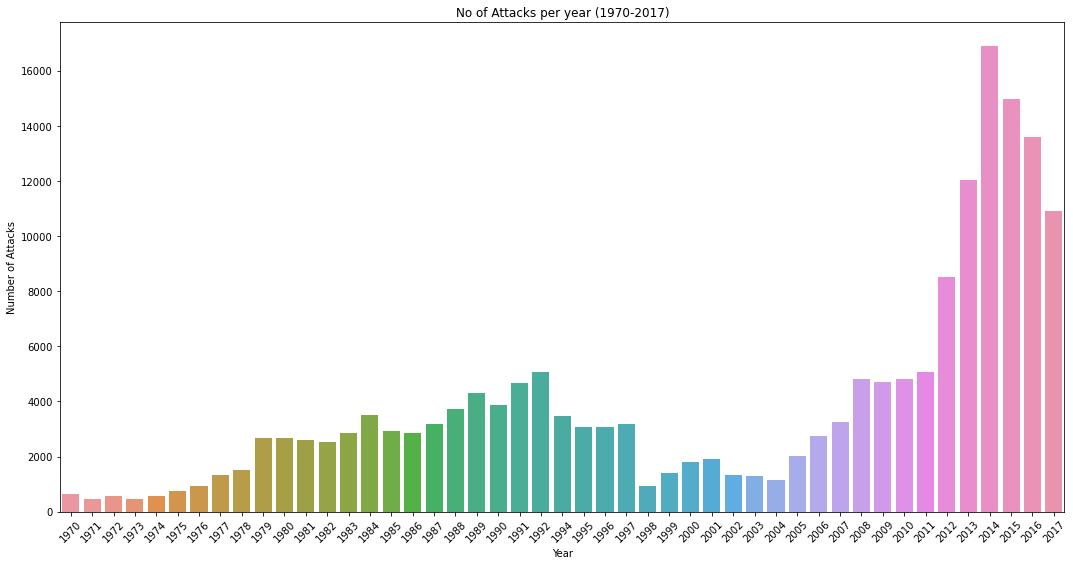

<IPython.core.display.Javascript object>

In [131]:
###Plot data without defining variables
plt.figure(figsize=(18, 9))
sns.countplot(data2["year"])
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.ylabel("Number of Attacks")
plt.title("No of Attacks per year (1970-2017)")
plt.show();

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

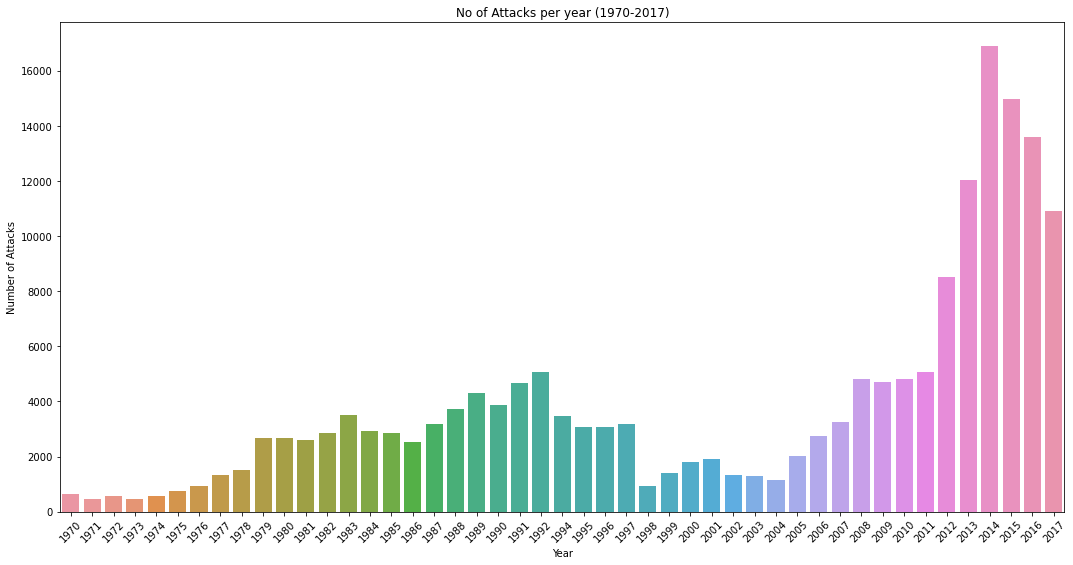

<IPython.core.display.Javascript object>

In [132]:
### Another method to plot the same data
plt.figure(figsize=(18, 9))
year = data2["year"].unique()
count = data2["year"].value_counts().sort_index()
sns.barplot(x=year, y=count)
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.ylabel("Number of Attacks")
plt.title("No of Attacks per year (1970-2017)")
plt.show();

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

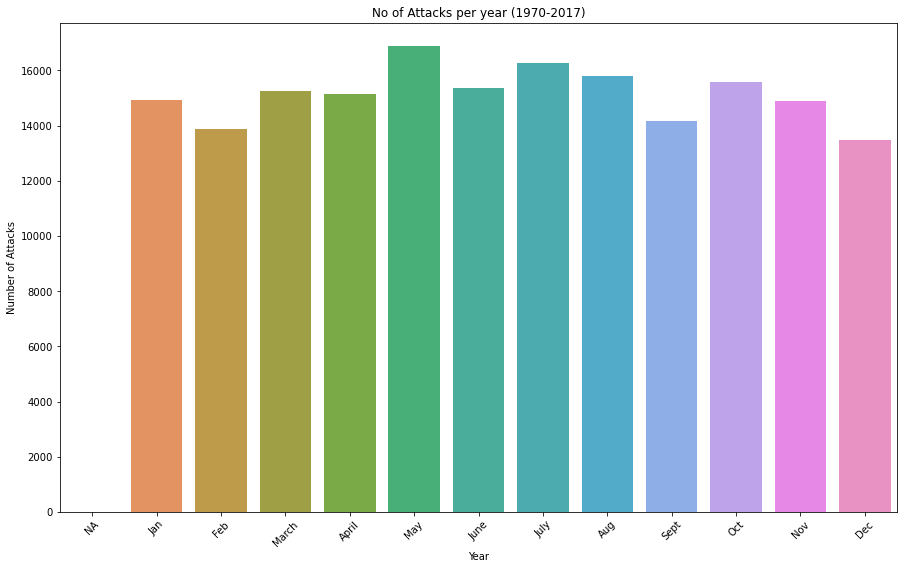

<IPython.core.display.Javascript object>

In [184]:
plt.figure(figsize=(15, 9))
ax = sns.countplot(data2["month"])
plt.xlabel("Year")
labels = [
    "NA",
    "Jan",
    "Feb",
    "March",
    "April",
    "May",
    "June",
    "July",
    "Aug",
    "Sept",
    "Oct",
    "Nov",
    "Dec",
]
ax.set_xticklabels(labels)
plt.xticks(rotation=45)
plt.ylabel("Number of Attacks")
plt.title("No of Attacks per year (1970-2017)")
plt.show()
###Attacks are evenly distriuted across each month of the year

In [144]:
###Show the top 15 most attacked countries
data2["country_name"].value_counts()[:15]

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Name: country_name, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

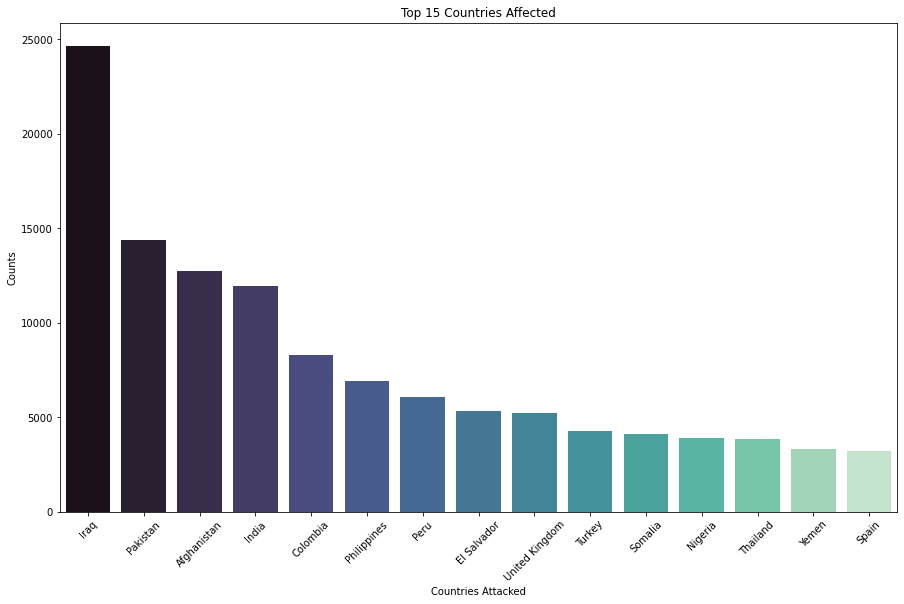

<IPython.core.display.Javascript object>

In [167]:
# Visualizing the top 10 attacked countries
plt.figure(figsize=(15, 9))
sns.barplot(
    data2["country_name"].value_counts()[:15].index,
    data2["country"].value_counts()[:15].values,
    palette=("mako"),
)
plt.title("Top 15 Countries Affected")
plt.xlabel("Countries Attacked")
plt.ylabel("Counts")
plt.xticks(rotation=45)
plt.show()

In [170]:
###The highest value of attacks was for unknown cities so I have dropped it from the counts
data2["city"].value_counts()[1:16]

Baghdad         7589
Karachi         2652
Lima            2359
Mosul           2265
Belfast         2171
Santiago        1621
Mogadishu       1581
San Salvador    1558
Istanbul        1048
Athens          1019
Bogota           984
Kirkuk           925
Beirut           918
Medellin         848
Benghazi         840
Name: city, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

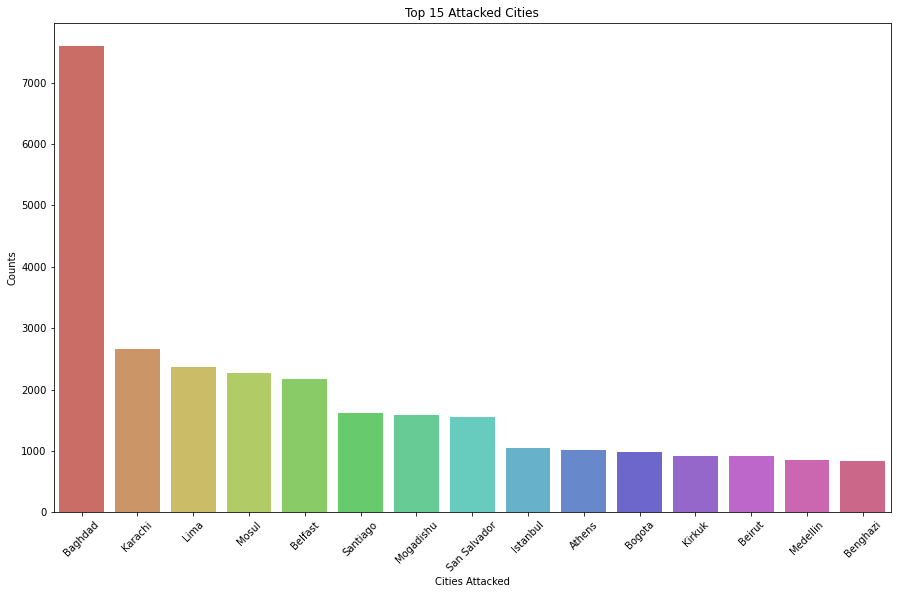

<IPython.core.display.Javascript object>

In [172]:
plt.figure(figsize=(15, 9))
sns.barplot(
    data2["city"].value_counts()[1:16].index,
    data2["city"].value_counts()[1:16].values,
    palette=("hls"),
)
plt.title("Top 15 Attacked Cities")
plt.xlabel("Cities Attacked")
plt.ylabel("Counts")
plt.xticks(rotation=45)
plt.show()

In [216]:
data2.groupby("country_name")["killed"].sum().sort_values(ascending=False)[0:10]

country_name
Iraq           78589.0
Afghanistan    39384.0
Pakistan       23822.0
Nigeria        22682.0
India          19341.0
Sri Lanka      15530.0
Syria          15229.0
Colombia       14698.0
Peru           12771.0
El Salvador    12053.0
Name: killed, dtype: float64

<IPython.core.display.Javascript object>

In [217]:
data2.groupby("city")["killed"].sum().sort_values(ascending=False)[1:11]

city
Baghdad          21151.0
Mosul             7140.0
Mogadishu         3913.0
Karachi           3688.0
New York City     2838.0
Tikrit            2679.0
Kabul             2493.0
Ramadi            2313.0
Maiduguri         2235.0
Aleppo            2125.0
Name: killed, dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

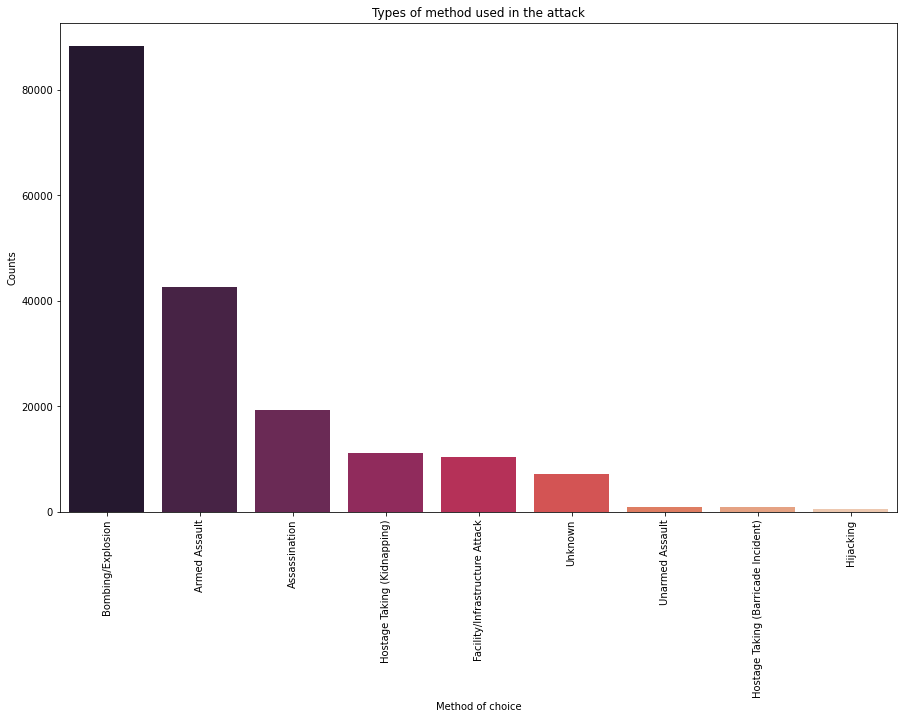

<IPython.core.display.Javascript object>

In [199]:
plt.figure(figsize=(15, 9))
sns.barplot(
    data2["attack_method"].value_counts()[:10].index,
    data2["attacktype"].value_counts()[:10].values,
    palette=("rocket"),
)
plt.title("Types of method used in the attack")
plt.xlabel("Method of choice")
plt.ylabel("Counts")
plt.xticks(rotation=90)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

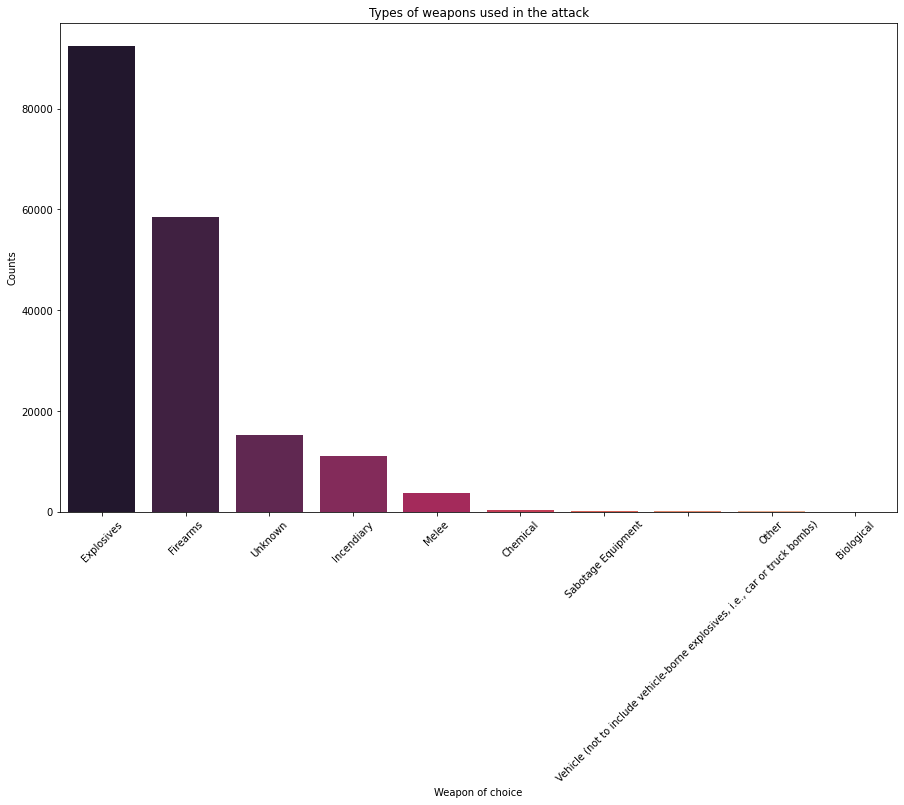

<IPython.core.display.Javascript object>

In [177]:
plt.figure(figsize=(15, 9))
sns.barplot(
    data2["weapontype"].value_counts()[:10].index,
    data2["weaptype"].value_counts()[:10].values,
    palette=("rocket"),
)
plt.title("Types of weapons used in the attack")
plt.xlabel("Weapon of choice")
plt.ylabel("Counts")
plt.xticks(rotation=45)
plt.show()

In [179]:
data2["nationality"].value_counts()[:15]

Iraq                24113
Pakistan            13900
India               12098
Afghanistan         10931
Colombia             7922
Philippines          6685
Peru                 5840
El Salvador          5212
United States        5065
Turkey               4636
Israel               4097
Thailand             3804
Nigeria              3759
Northern Ireland     3367
Somalia              3160
Name: nationality, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

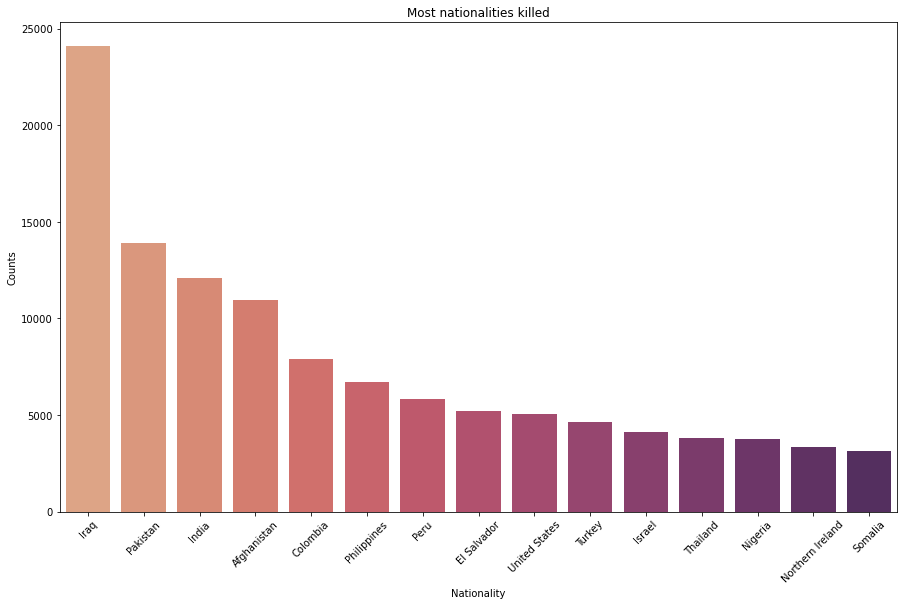

<IPython.core.display.Javascript object>

In [190]:
plt.figure(figsize=(15, 9))
sns.barplot(
    data2["nationality"].value_counts()[:15].index,
    data2["natlty1"].value_counts()[:15].values,
    palette=("flare"),
)
plt.title("Most nationalities killed")
plt.xlabel("Nationality")
plt.ylabel("Counts")
plt.xticks(rotation=45)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

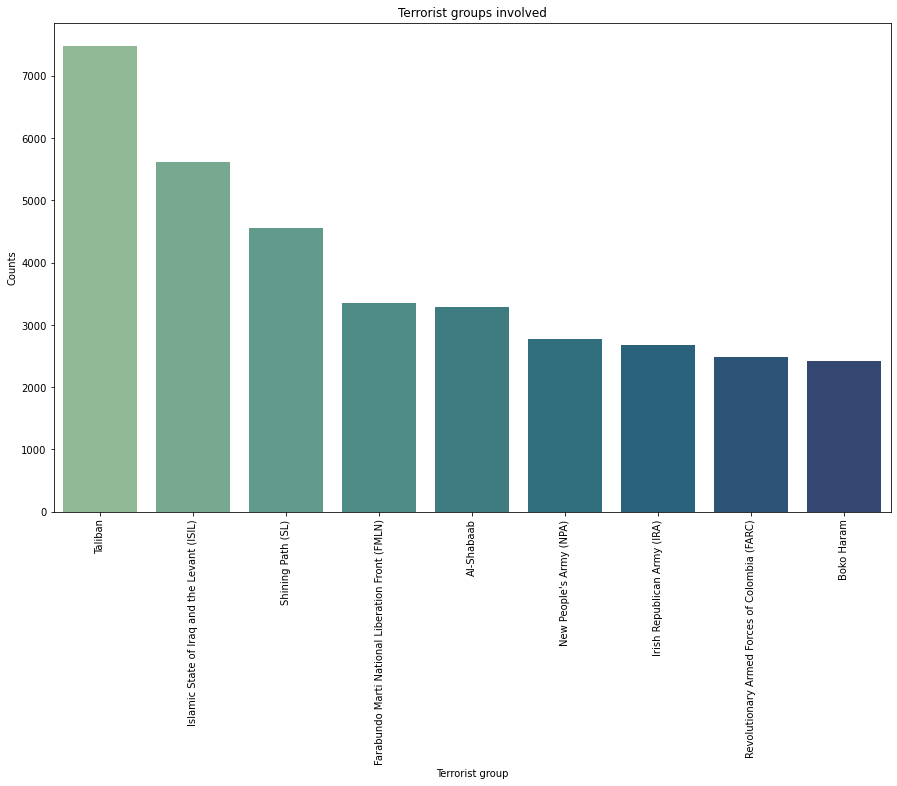

<IPython.core.display.Javascript object>

In [191]:
plt.figure(figsize=(15, 9))
sns.barplot(
    data2["terrorist_group"].value_counts()[1:10].index,
    data2["terrorist_group"].value_counts()[1:10].values,
    palette=("crest"),
)
plt.title("Terrorist groups involved")
plt.xlabel("Terrorist group")
plt.ylabel("Counts")
plt.xticks(rotation=90)
plt.show()

In [204]:
print(
    "Total number of people killed in terrorist attacks between 1970 and 2017 are "
    + str(data2["killed"].sum())
)
print()
print(
    "Total number of people killed in terrorist attacks between 1970 and 2017 are "
    + str(data2["wounded"].sum())
)
print()
print(
    "Total number of people affected by terrorist attacks between 1970 and 2017 are "
    + str(data2["killed"].sum() + data2["wounded"].sum())
)

Total number of people killed in terrorist attacks between 1970 and 2017 are 411868.0

Total number of people killed in terrorist attacks between 1970 and 2017 are 523869.0

Total number of people affected by terrorist attacks between 1970 and 2017 are 935737.0


<IPython.core.display.Javascript object>

Other key findings:
1. 2014 saw the most number of terrorist attacks (Total=16903), closely followed by 2015 (Total=14965) and 2016 (13587).

2. Iraq is the most attacked country in the world.

3. Baghdad is the unsafest city in the world, witnessing 7589 attacks.

4. 21151 people have been killed in Baghdad, and 78589 people in Iraq.

4. Bombing/Explosion is most frequent methods of attacks.

5. Explosives and firearms are mostly used weapons in attacks.

6. Till 2017, 24113 Iraqi nationals have been killed in terrorist attacks.

7. Taliban was involved in most of the terrorist attacks.